# Relatório de Análise 7

## Criando Agrupamentos

In [21]:
import pandas as pd

In [22]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [23]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [24]:
dados['Valor'].mean()

5046.172821405663

#### Estatística Descritiva na Documentação do Pandas
https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#computations-descriptive-stats

In [25]:
# Criando um novo DataFrame usando isin()
"""
Relembrando: isin() retorna Series booleanas indicando se os valores estão ou não contidos em seleção prévia.

O resultado só será verdadeiro em um local se todos os os rótulos correspondem.
Se os valores forem uma série, esse é o índice.
Se valores é um dicionário, as chaves devem ser os nomes das colunas, que deve corresponder.
Se os valores forem um DataFrame, então, os rótulos do índice e da coluna devem corresponder.

"""
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [26]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [27]:
type(selecao)

pandas.core.series.Series

In [28]:
# Criando um grupo com base nos Bairros pré-definidos
grupo_bairro = dados.groupby('Bairro')

In [29]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [30]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

Descobriremos por meio do método type() que essa variável é do tipo DataFrameGroupBy.   
Temos uma propriedade chamada groups, que consiste em um dicionário em que a chave é variável    
utilizada como indexador e os índices em que os registros de bairro foram encontrados.   
Dessa forma, é criada uma indexação do nosso DataFrame para facilitar consultas e crianção de tabelas.

__Faremos um laço e exibiremos os bairros:__

In [31]:
for bairro, dados in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [32]:
for bairro, dados in grupo_bairro:
    print(type(dados))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [33]:
for bairro, data in grupo_bairro:
    print(f'{bairro} -> {dados.Valor.mean()}') # poderia ser dados['Valor'].mean() também

Barra da Tijuca -> 2043.52
Botafogo -> 2043.52
Copacabana -> 2043.52
Flamengo -> 2043.52
Ipanema -> 2043.52
Leblon -> 2043.52
Tijuca -> 2043.52


In [34]:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

In [35]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [39]:
grupo_bairro['Valor'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7070.0,11874.0,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8792.0,152202.0,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4127.0,3611.0,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4114.0,3839.0,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.0,8220.0,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.0,7004.0,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2044.0,1664.0,750.0,1500.0,1800.0,2300.0,45000.0


Rapidamente perceberemos alguns problemas: percebmos que o desvio padrão(std) apresenta uma    
variação muito grande no caso de Botafogo, o mesmo ocorre para Barra da Tijuca.    
No caso de valor máximo, perceberemos valores estranhos também; segundo a tabela, existem imóveis    
disponíveis em em Botafogo com a locação de 4500000.0.

Essas informações estão errôneas, muito provavelmente esses valores correspondem à venda e     
não à locação.

<font color='brown'>__Para solucionar essa questão. Coletaremos a variável Valor, e em seguida utilizaremos    
    o método aggregate() que receberá como parâmetro o conjunto de estatísticas que nos interessam.__</font>

In [40]:
# Usando o método aggregate()
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [62]:
# Agregando as descritivas e renomeando as colunas
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


__Se nós não tivéssemos escolhido apenas alguns bairros para retornar a estatística descritiva, a dificuldade de visualizar aqui seria enorme.   
Teríamos que salvar outro DataFrame para visualizar em uma análise mais detalhada criando mais um notebook.   
Fica difícil enconrar problemas nos dados muito volumosos, como estão aqui.__

## Análises Gráficas: Matplotlib

In [49]:
# Config necessária para exibir os gráficos no Jupyter
%matplotlib inline

import matplotlib.pyplot as plt

plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Devio Padrão do Aluguel por Bairro')

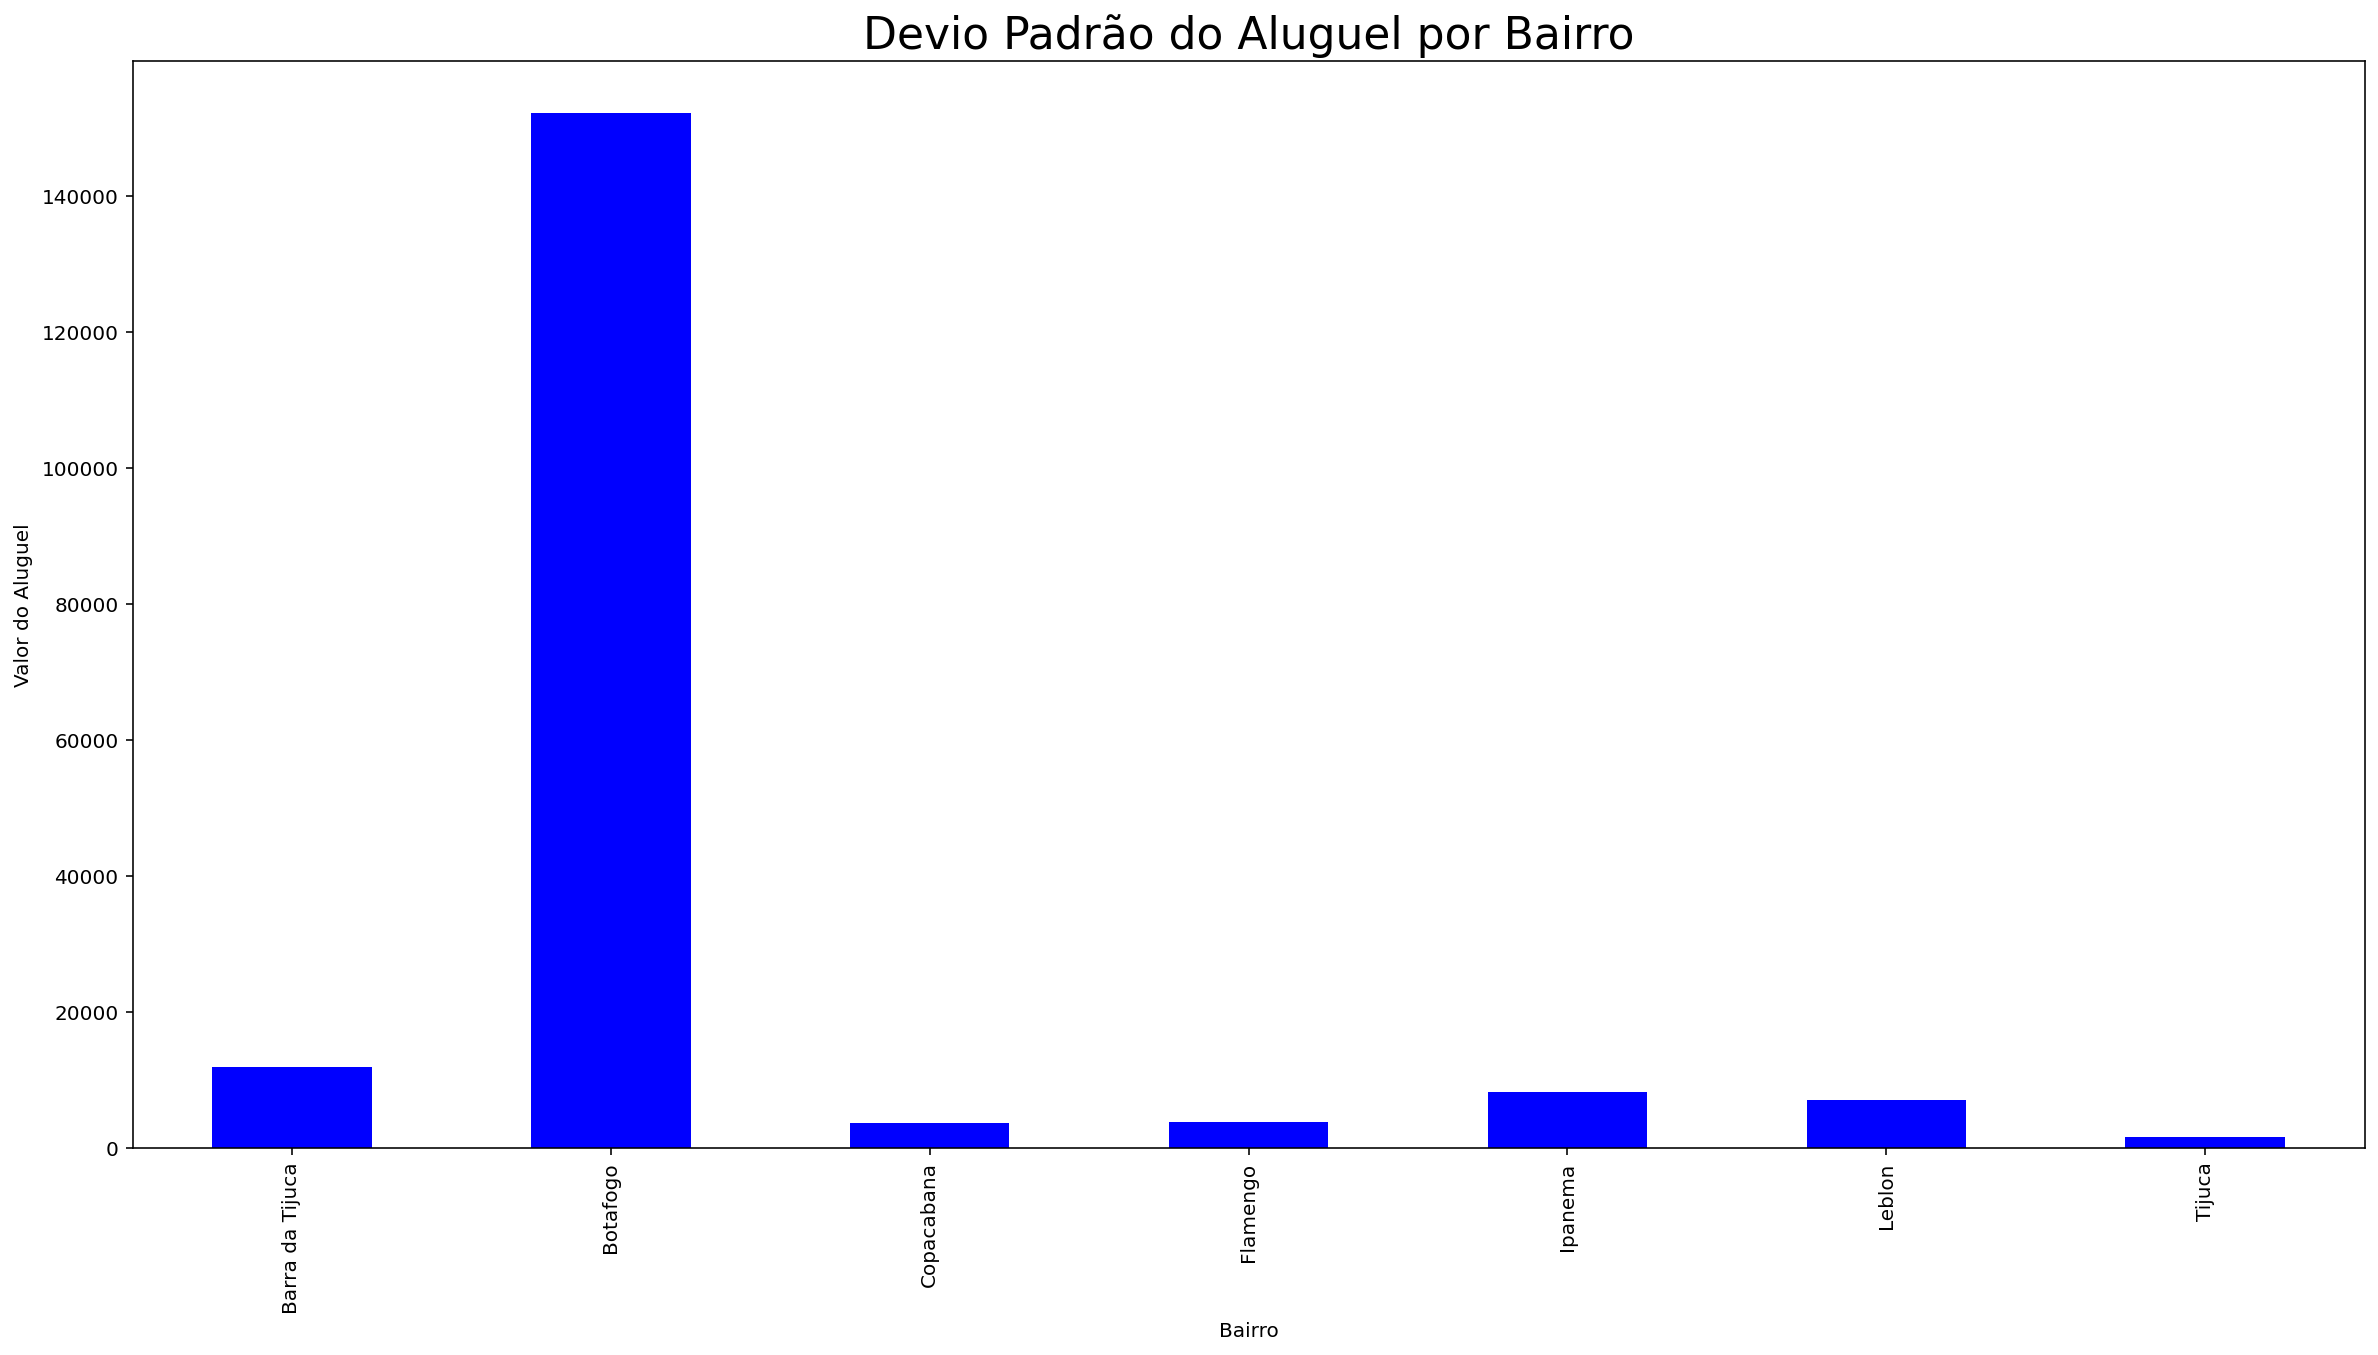

In [54]:
# Plotando um gráfico com o desvio padrão do aluguel por bairro do grupo

fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Devio Padrão do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

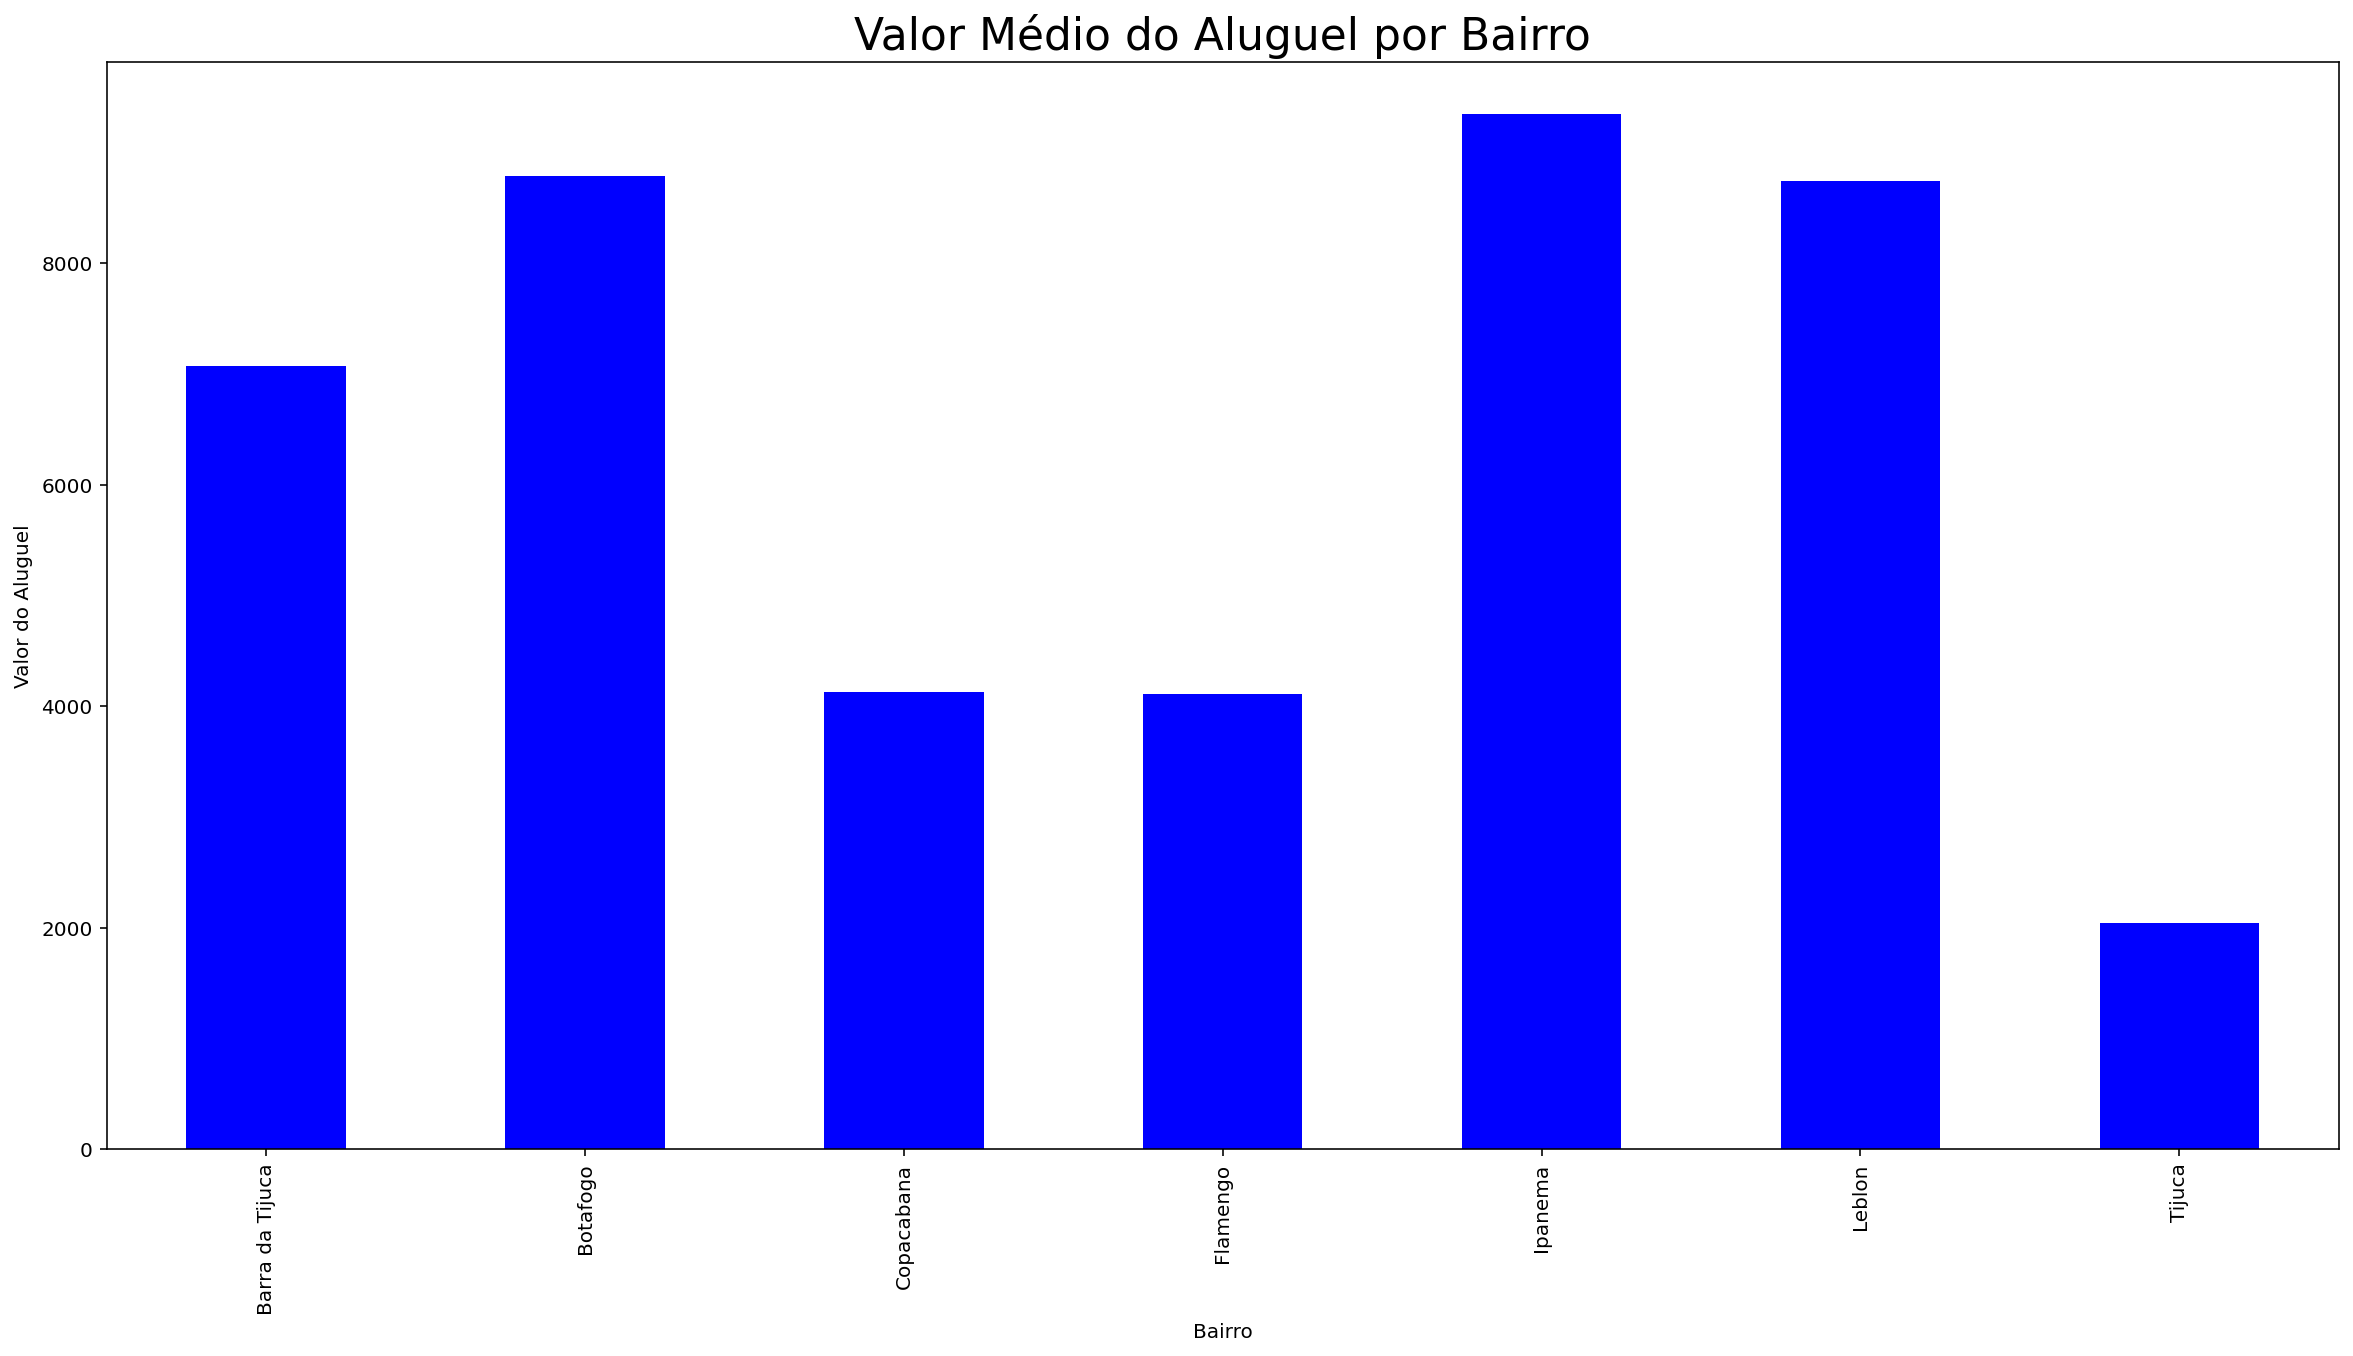

In [55]:
# Plotando um gráfico com o valor médio do aluguel por bairro do grupo

fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

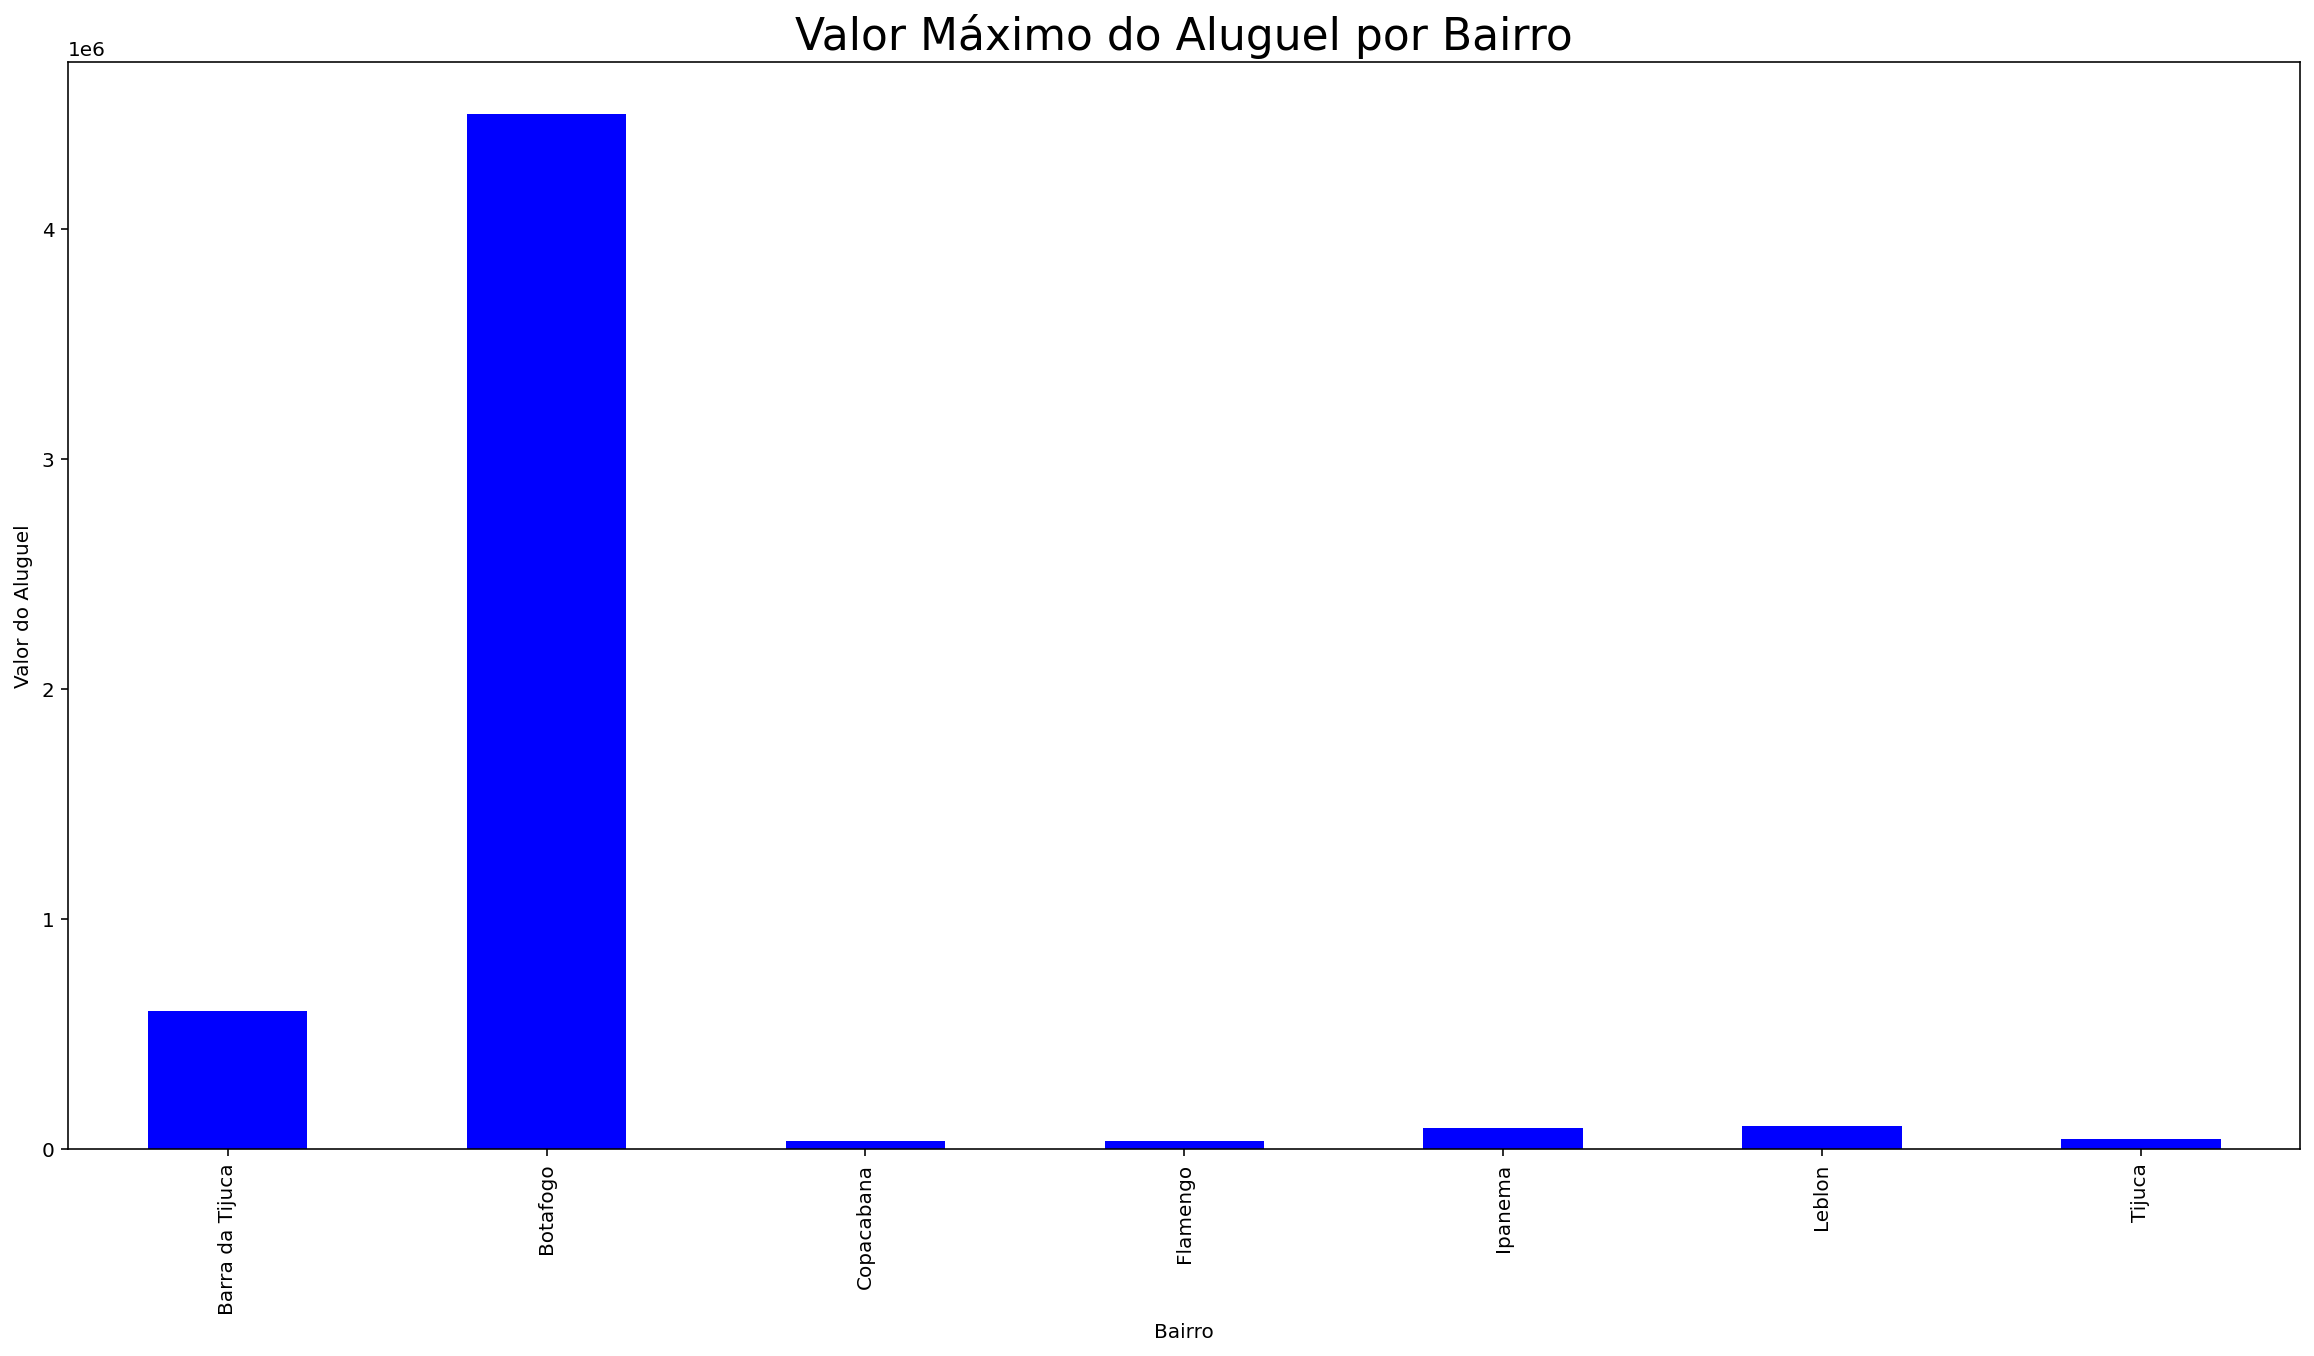

In [56]:
# Plotando um gráfico com o valor máximo do aluguel por bairro do grupo

fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Mínimo do Aluguel por Bairro')

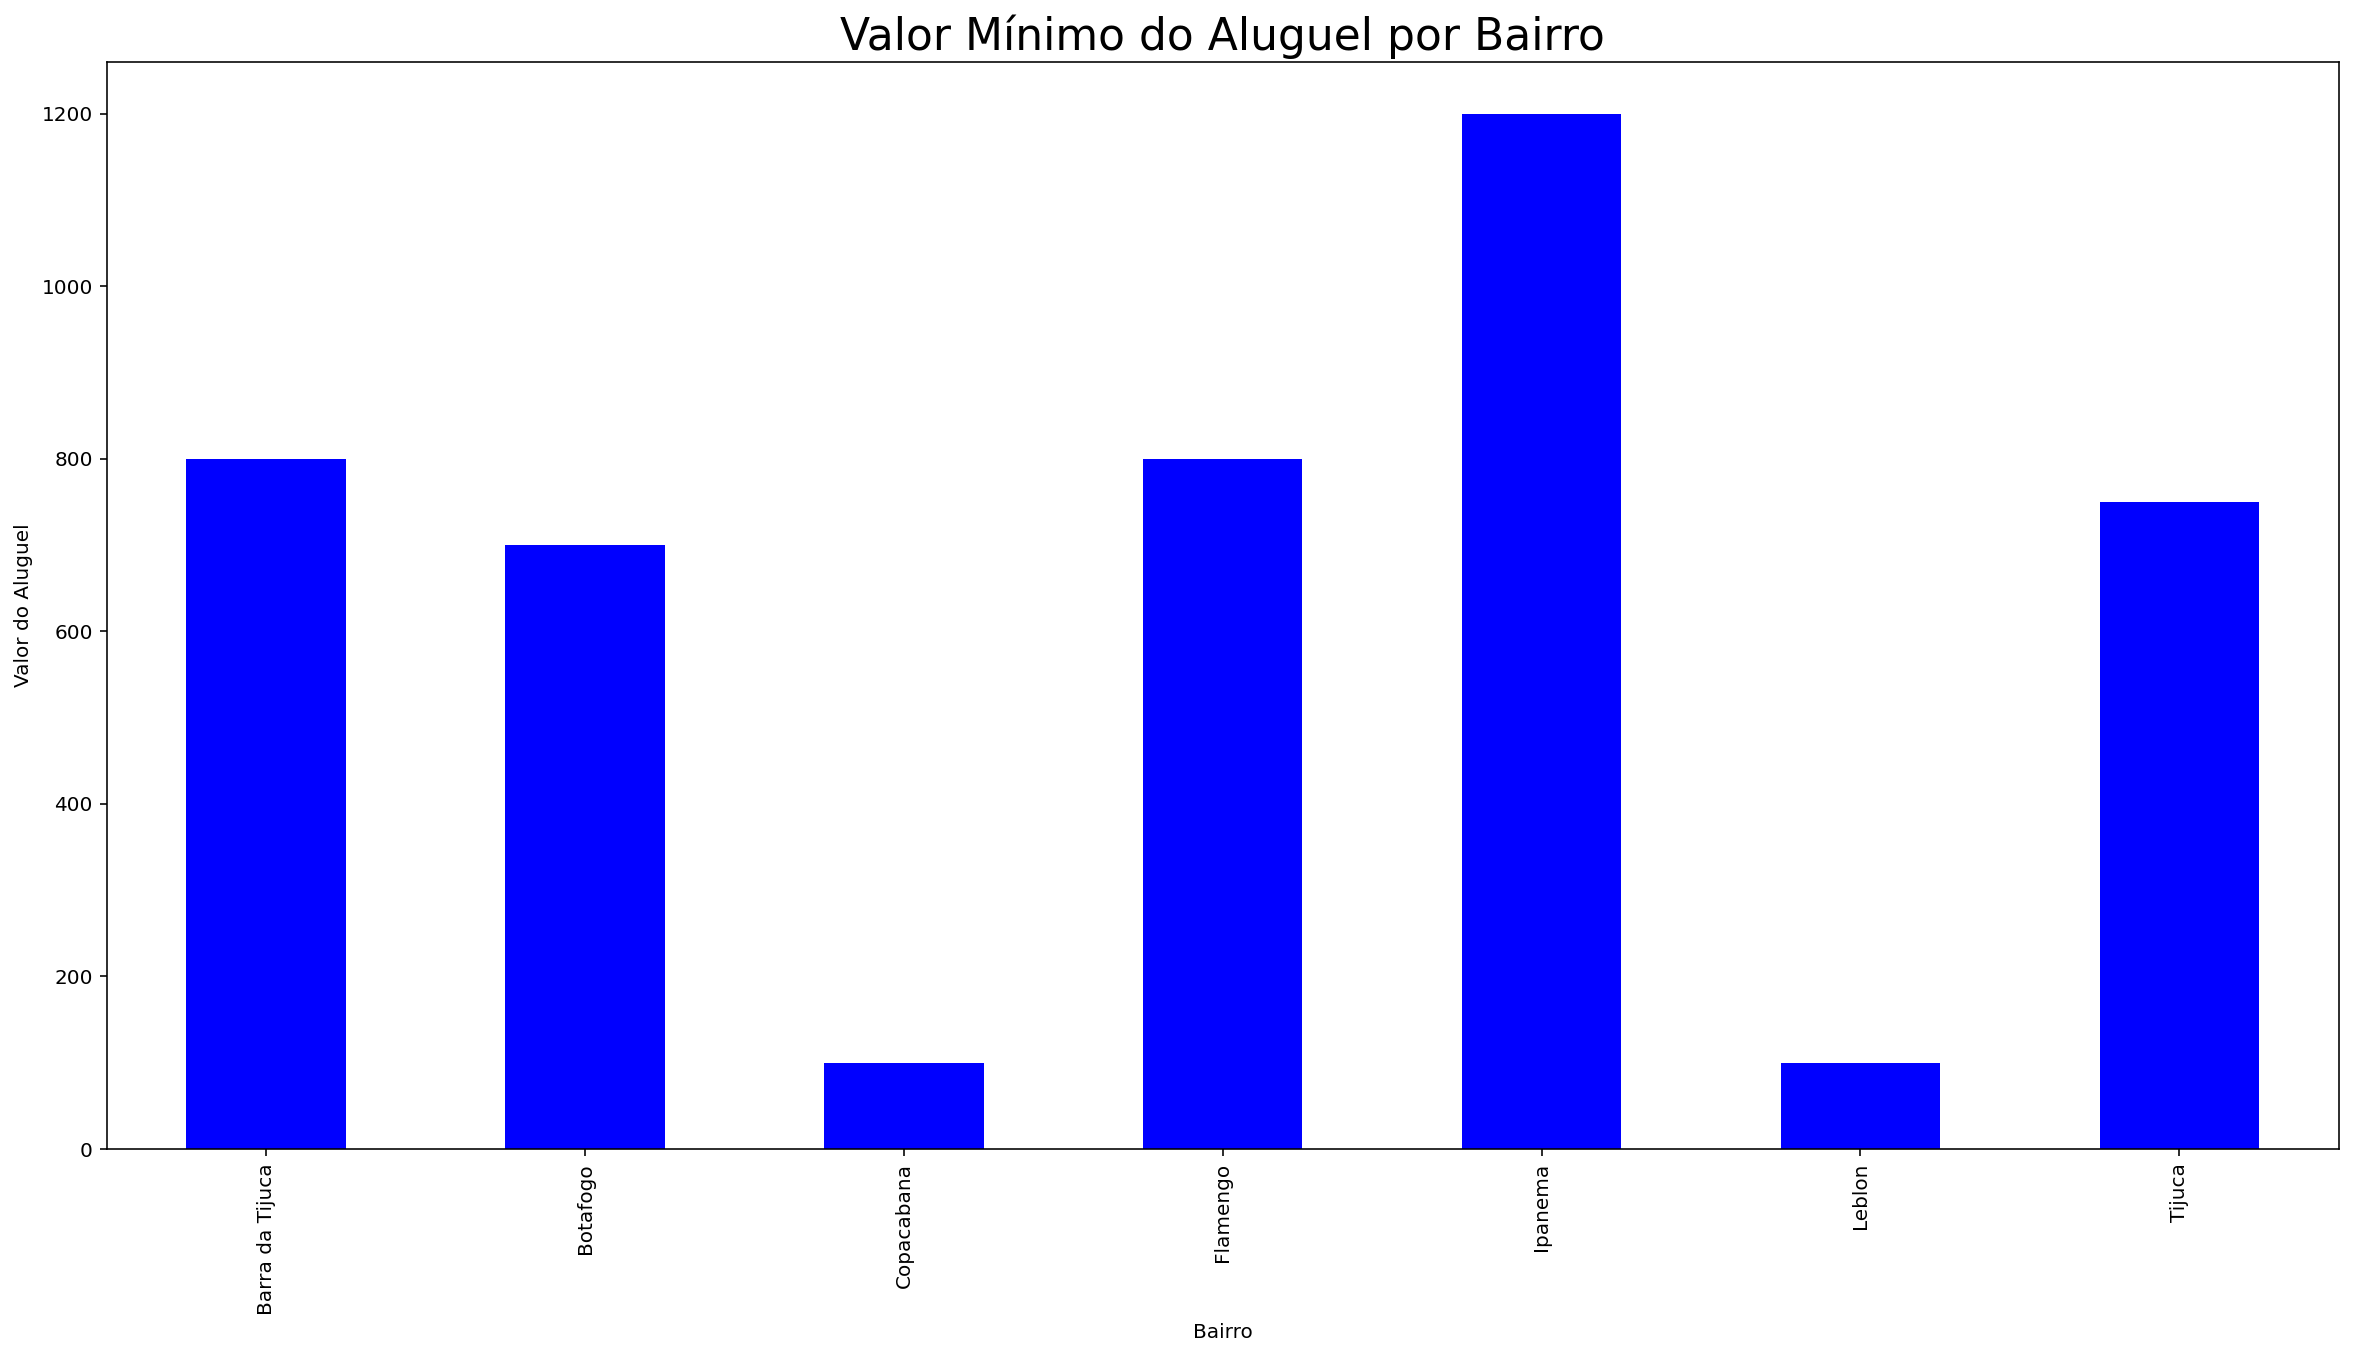

In [57]:
# Plotando um gráfico com o valor mínimo do aluguel por bairro do grupo

fig = grupo_bairro['Valor'].min().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Mínimo do Aluguel por Bairro', {'fontsize': 22})

__OBS: Como desafio devemos calcular as descritivas para outras colunas também.__

## Exercícios

#### 01 - Sumarizando informações

Considere o seguinte DataFrame para responder o exercício abaixo:

In [36]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'],
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'],
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35],
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6],
                        'Aprovado': [True, False, False, True, True, True, False, False]},
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


Como devemos proceder para obter um DataFrame com as notas médias dos alunos, com duas casas decimais, segundo seu sexo?

In [37]:
sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


#### 02 - Selecionando as estatísticas descritivas

A criação de grupamentos com o método groupby() facilita bastante na sumarização das informações de um DataFrame. O método describe() aplicado a um grupamento gera um conjunto de estatísticas descritivas bastante útil no processo de análise de dados, conforme o exemplo abaixo:

In [58]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5],
                        ['Mercado', 'Cebola', 1.99],
                        ['Supermercado', 'Cebola', 1.69],
                        ['Feira', 'Tomate', 4],
                        ['Mercado', 'Tomate', 3.29],
                        ['Supermercado', 'Tomate', 2.99],
                        ['Feira', 'Batata', 4.2],
                        ['Mercado', 'Batata', 3.99],
                        ['Supermercado', 'Batata', 3.69]],
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [59]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

Utilizando o DataFrame (precos) acima, que código seria necessário para gerar a visualização abaixo:
```
Produto	Média	Desvio Padrão	Mínimo	Máximo
Cebola	3.96	0.26	3.69	4.2
Tomate	2.06	0.41	1.69	2.5
Batata	3.43	0.52	2.99	4.0
```

In [61]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0


__O método aggregate() permite selecionar um conjunto de estatísticas personalizado.    
É possível declarar o método de forma simplificada, utilizando agg().__

## Fim